In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
import prince

In [37]:
df = pd.read_csv('SampleSuperstore.csv')
df = df.drop(['Postal Code'], axis = 1) 

In [38]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [39]:
df.shape

(9994, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [41]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Visualizing patterns and outliers that may be present in the dataset

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 7 Text major ticklabel objects>)

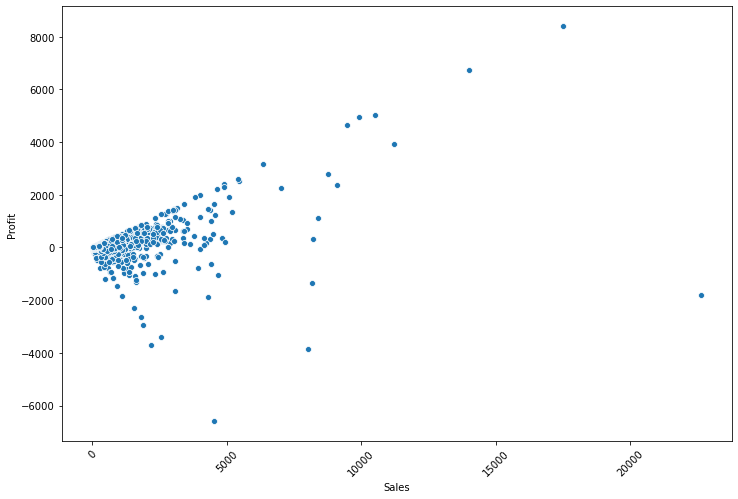

In [42]:
fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

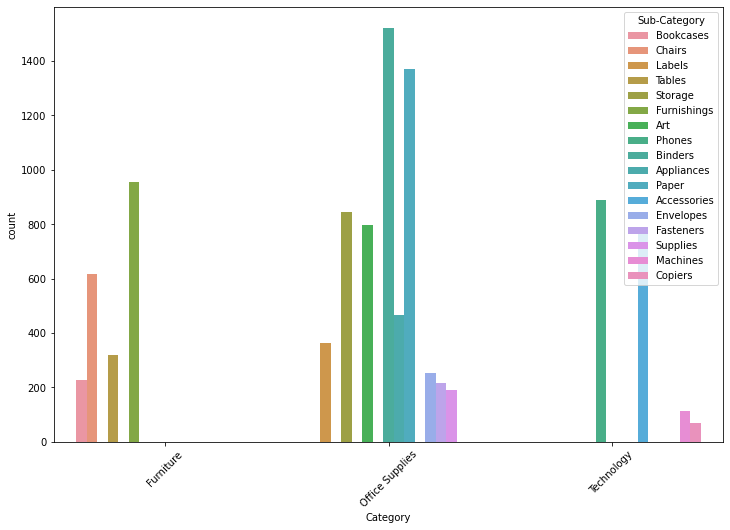

In [43]:
fig,ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Category", hue="Sub-Category", data=df, ax=ax)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

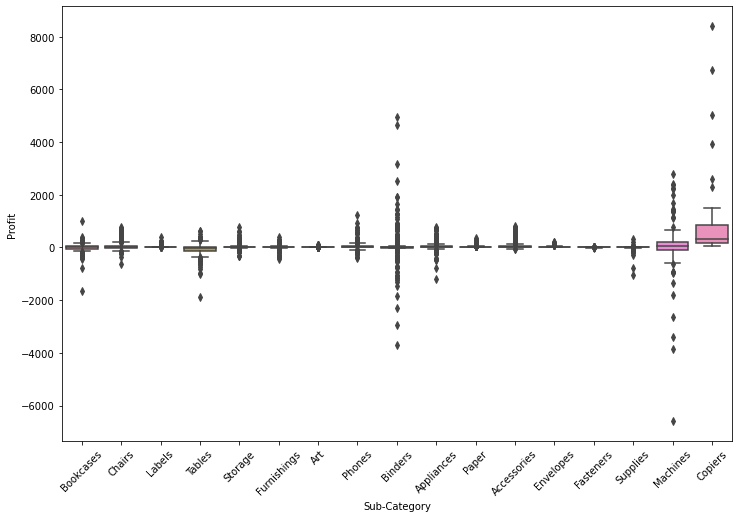

In [44]:
fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="Sub-Category", y="Profit", data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

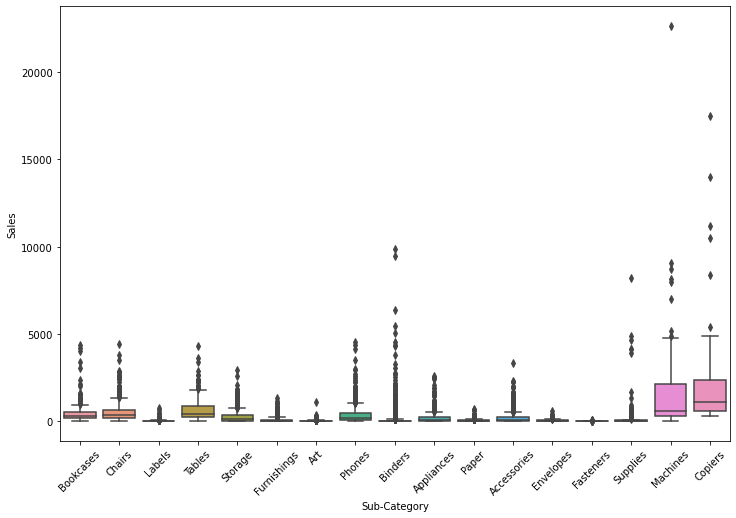

In [45]:
fig,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="Sub-Category", y="Sales", data=df)
plt.xticks(rotation=45)

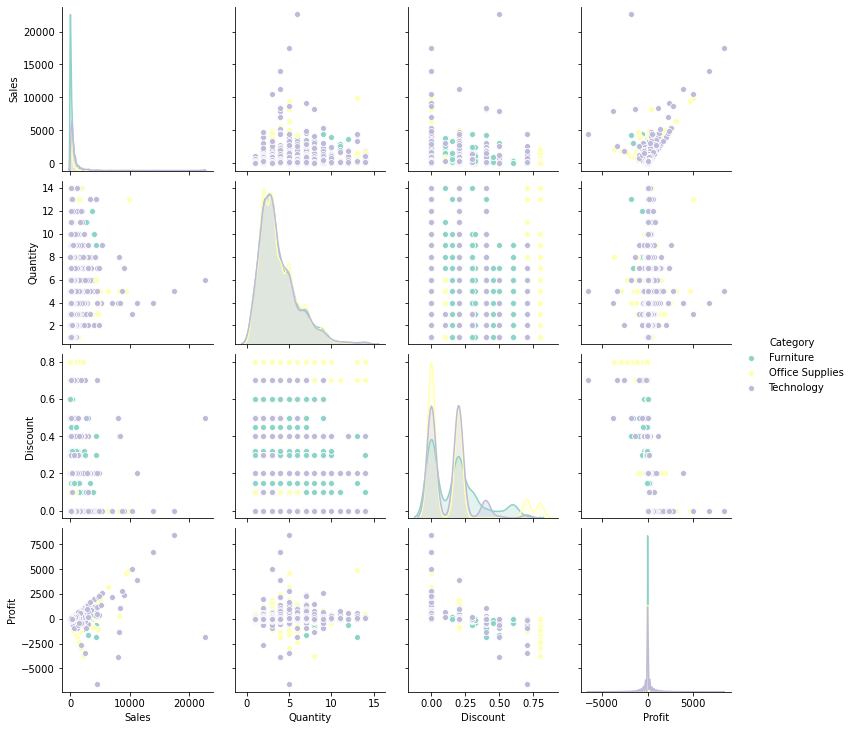

In [46]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df, vars=numeric_cols[:5], hue="Category", palette='Set3')

# Calculating and visualizing the correlation between different numeric columns 

In [52]:
df_num = df[numeric_cols]
df_corr = df_num.corr()
print(df_corr, "\n")
print(df_corr.mean(), "\n")
print(df_corr.abs().mean(), "\n")

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000 

Sales       0.412917
Quantity    0.318918
Discount    0.190236
Profit      0.331458
dtype: float64 

Sales       0.427012
Quantity    0.318918
Discount    0.314075
Profit      0.441201
dtype: float64 



(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

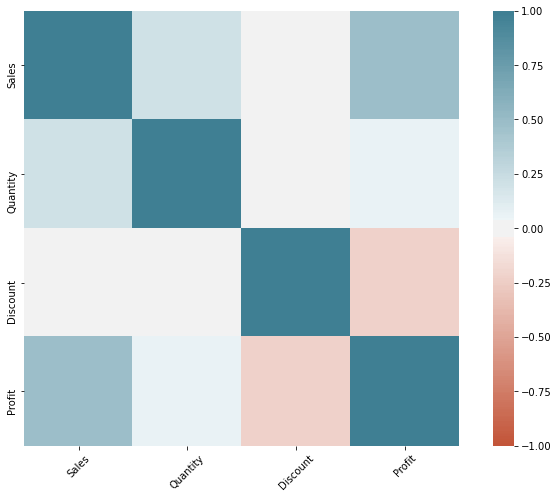

In [53]:
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, square=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220, n=200))
plt.xticks(rotation=45)

In [57]:
print(df_num.columns.tolist())
X = StandardScaler().fit_transform(df_num)
kmeans = KMeans(n_clusters=5, init='random')
kmeans.fit(X)
pred = kmeans.predict(X)
np.unique(pred)

['Sales', 'Quantity', 'Discount', 'Profit']


array([0, 1, 2, 3, 4])

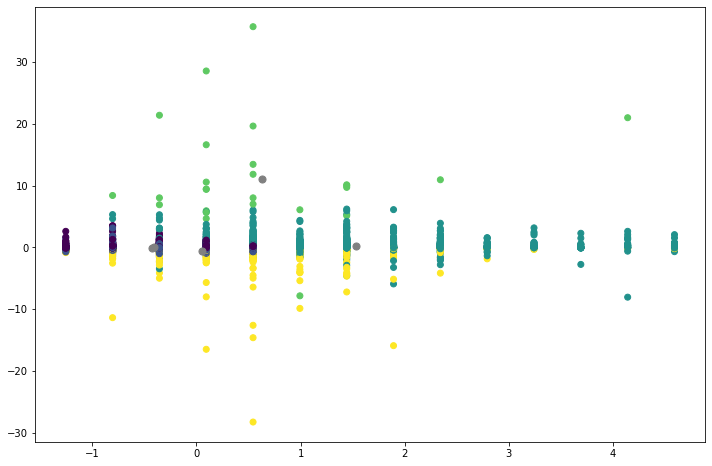

In [58]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(X[:,1], X[:,3], c=pred, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,3], c='grey', s=50)

# Visualizing PCA

In [59]:
pca = PCA(n_components=0.95)
pca.fit(X)
pcad = pca.transform(X)
print(pca.explained_variance_ratio_)

[0.39749164 0.26467547 0.22033905 0.11749384]


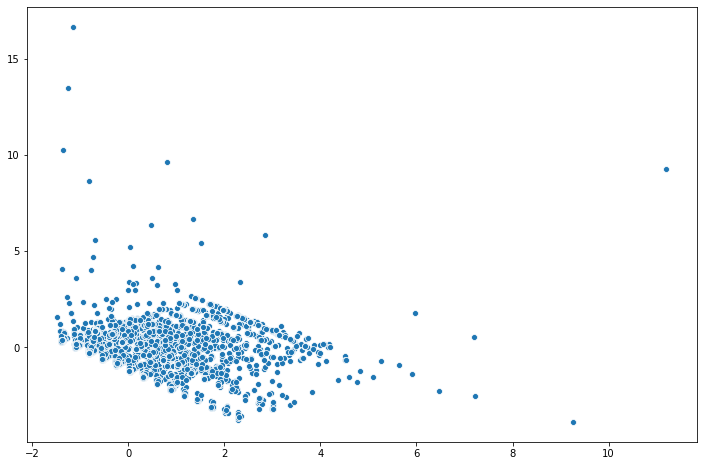

In [60]:
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(pcad[:,1], pcad[:,2])

In [61]:
pca2 = prince.PCA(n_components=4, n_iter=3, rescale_with_mean=True, rescale_with_std=True, copy=True, engine='auto')
pca2 = pca2.fit(df_num)
pca2.explained_inertia_

[0.3974916367482129,
 0.2646754719180632,
 0.220339054425383,
 0.11749383690834031]

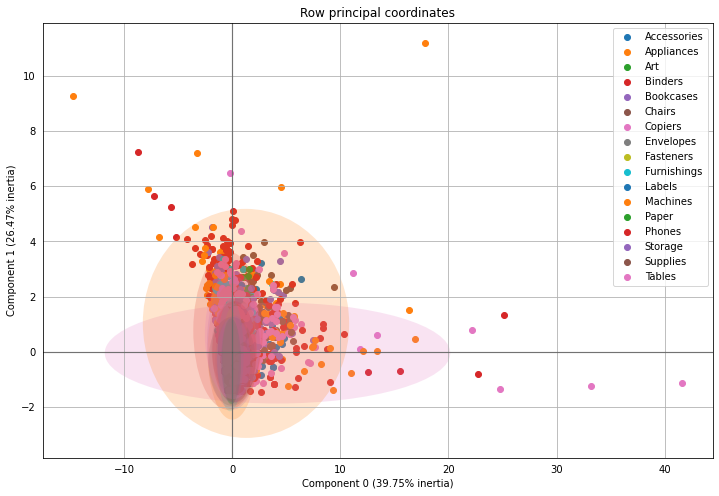

In [62]:
ax=pca2.plot_row_coordinates(df_num, ax=None, figsize=(12,8),
                            x_component=0, y_component=1, labels=None,
                            color_labels=df['Sub-Category'],
                            ellipse_outline=False, ellipse_fill=True,
                            show_points=True)